In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, precision_score, recall_score ,f1_score
import time
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, RandomizedSearchCV
import xgboost as xg
from collections import Counter
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [61]:
df = pd.read_csv('Churn_Modelling.csv')

In [62]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [64]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [65]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [66]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [67]:
df["Exited"].replace({0:"No",1:"Yes"},inplace=True)

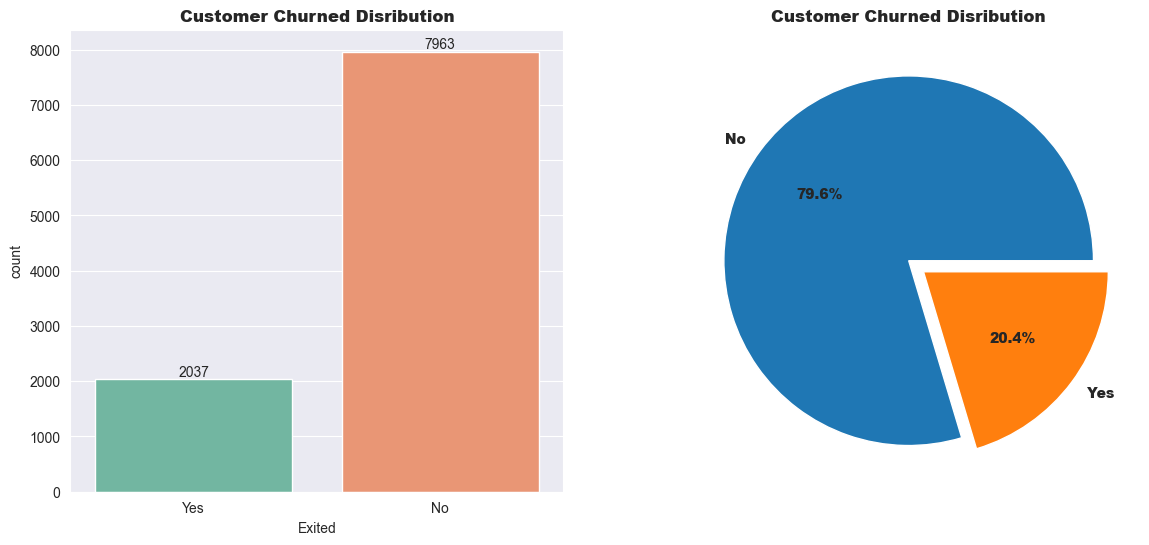

In [68]:
count = df['Exited'].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="Exited", data=df, palette="Set2")

for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.title("Customer Churned Disribution",fontweight="black")

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%", textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black")
plt.show()

In [69]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, hue = "Exited", data=df, palette="Set2")

    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    plt.title(f"Customer Churned by {column}",fontweight="black")

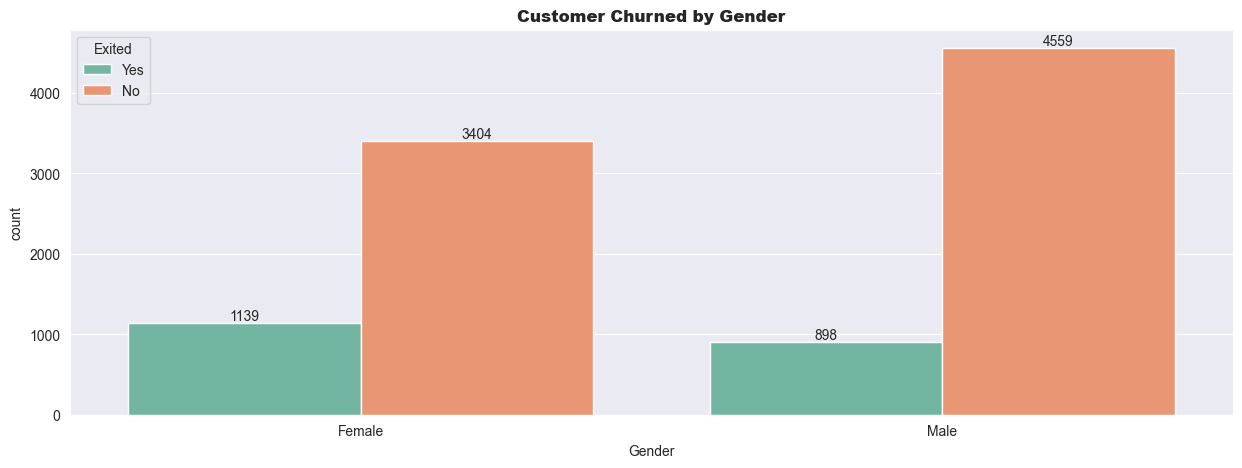

In [70]:
countplot("Gender")

📊 Inference:
📌 The churned probabillity is more for Feamle Customers compared to male customers.
📌 Which means female customers are more deactivating their banking facilities compared to male customers.

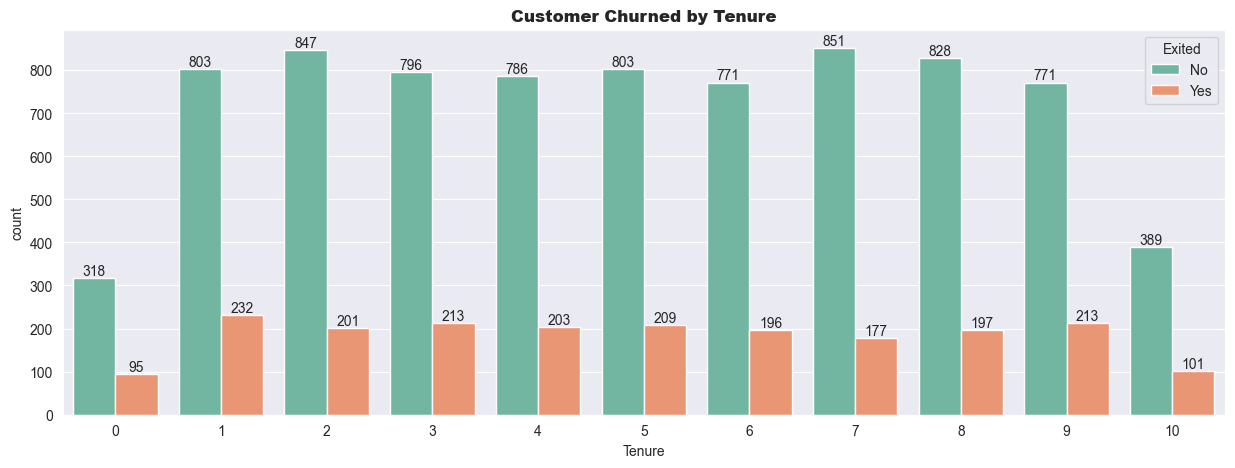

In [71]:
countplot("Tenure")

📊 Inference:
📌 The highest tenure is 10 years which means that those customers have opened their account 10 years back.
📌 Since there is almost similar distribution of churn status we can't make any specific inference.

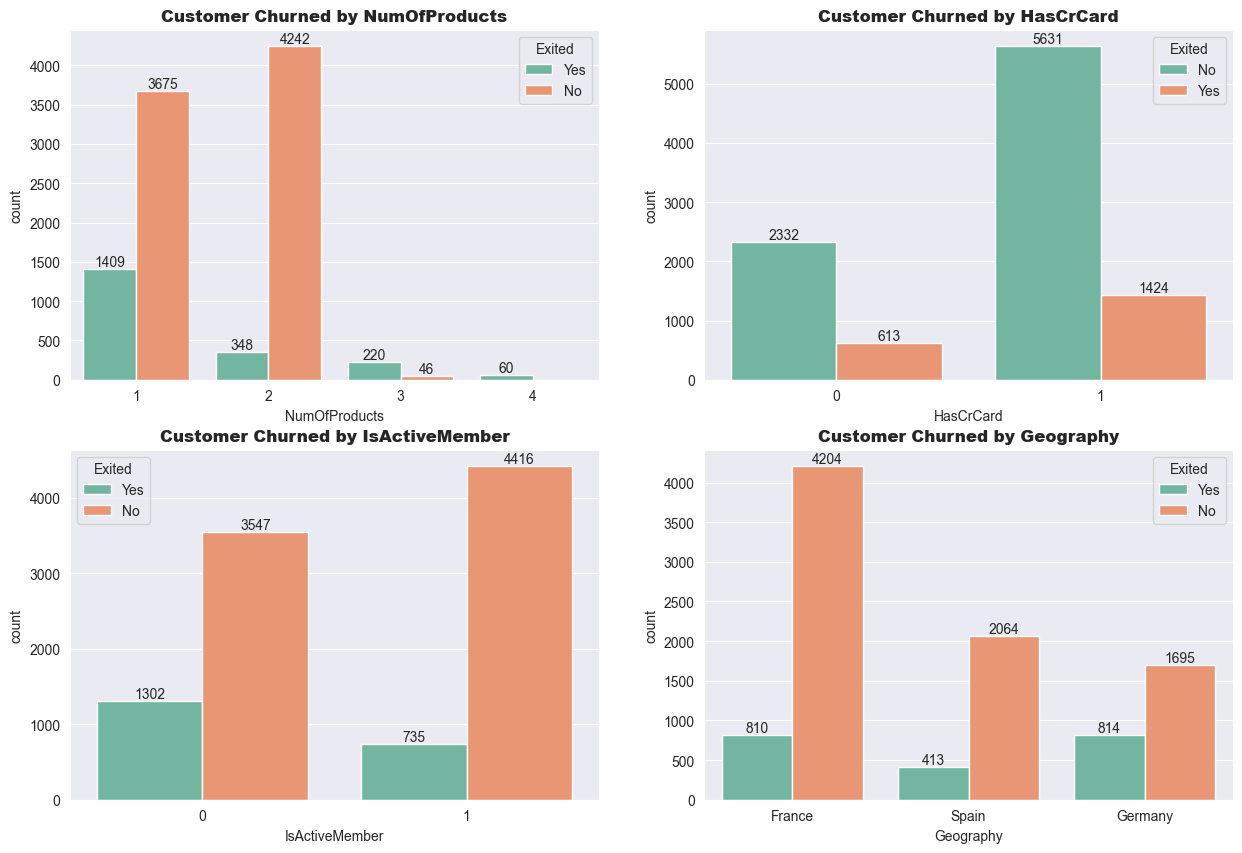

In [72]:
column = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography']
plt.figure(figsize=(15, 10))
for i, col in enumerate(column, 1):
    plt.subplot(2,2,i)
    ax = sns.countplot(x=col, hue = "Exited", data=df, palette="Set2")

    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    plt.title(f"Customer Churned by {col}",fontweight="black")

📊 Inference:
📌 Most of the customers are having either 1 or 2 total number of banking products.
Very few customers are having more than 2 total number of banking products.
The lowest churn rate is with customers having only 2 products.
There is very high churn rate in customers having 1 product or more than 2 products.

📌 More than 70% of customers are having credit card.
The churn probability value for the both the categories is almost 1:4.
So credit card is not affecting the churn of customers.

📌 There is approxiamately equal customer who are either active or not active.
So customers which are not active are morely likely to deactivate their banking facilities.

📌 Half of the customers are from France followed by Germany and Spain.
Despite of the huge total customers difference between France & Germany the churned rate for France and Germany customers are same.
There are almost equal customers from Spain & Germany, but the Churn rate is almost double in Germany when compared with spain.

In [73]:
def continous_plot(column):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column, hue = 'Exited', data=df, kde = True, palette="Set2")
    plt.title(f"Customer Churned Disribution by {column}",fontweight="black")

    plt.subplot(1,2,2)
    sns.boxplot(x = df["Exited"], y = df[column],palette="Set2")
    plt.title(f"Customer Churned Disribution by {column}",fontweight="black")
    plt.show()

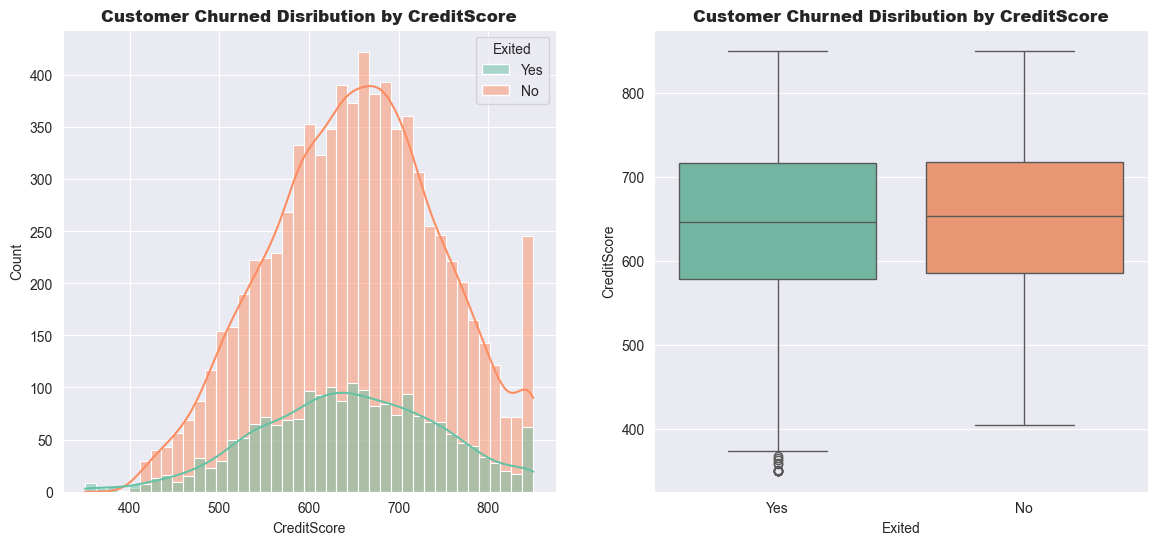

In [74]:
continous_plot('CreditScore')

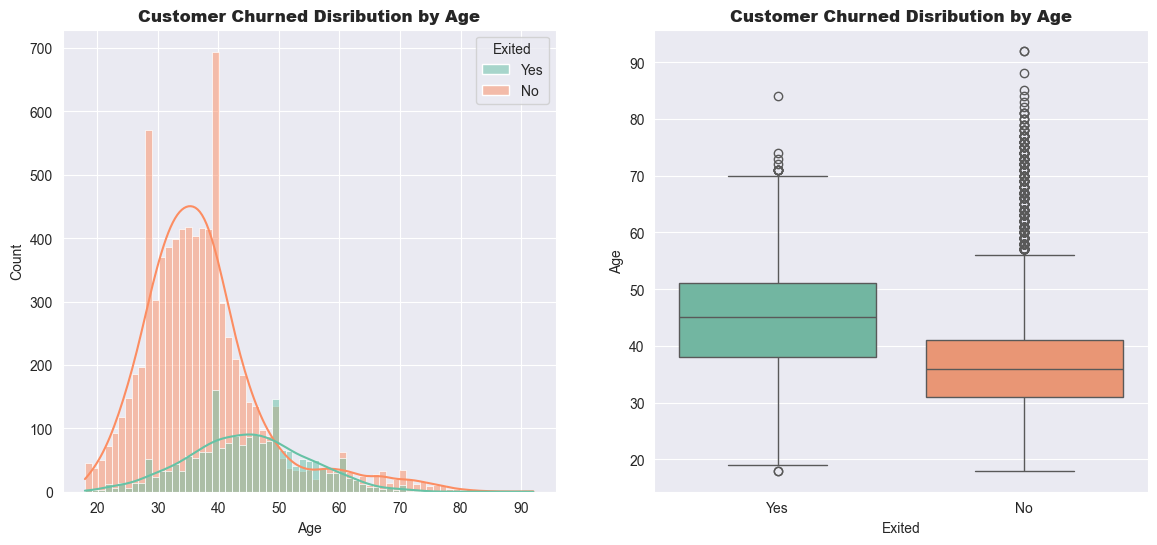

In [75]:
continous_plot('Age')

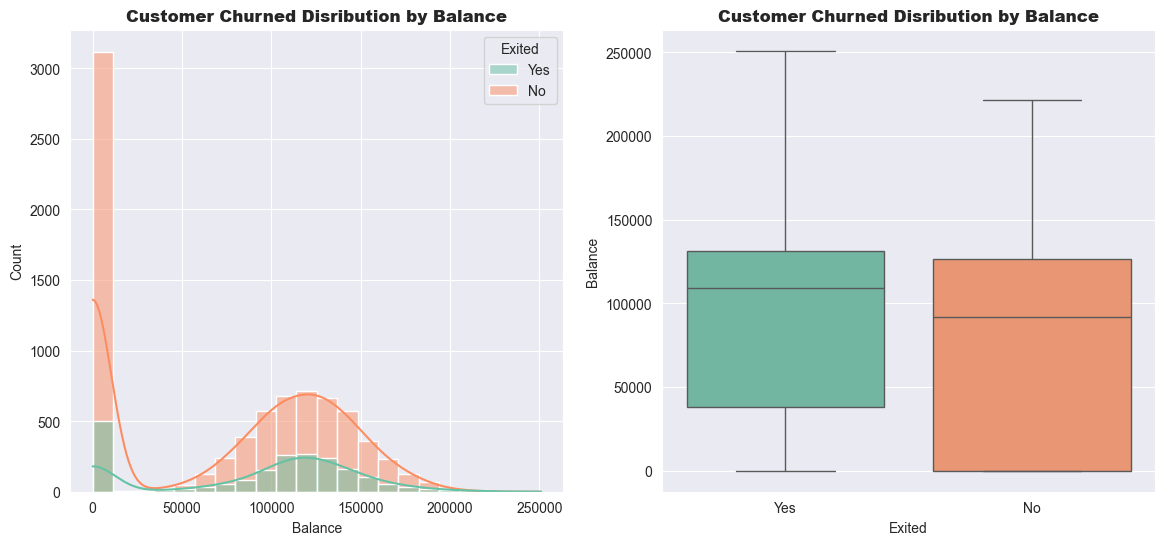

In [76]:
continous_plot('Balance')

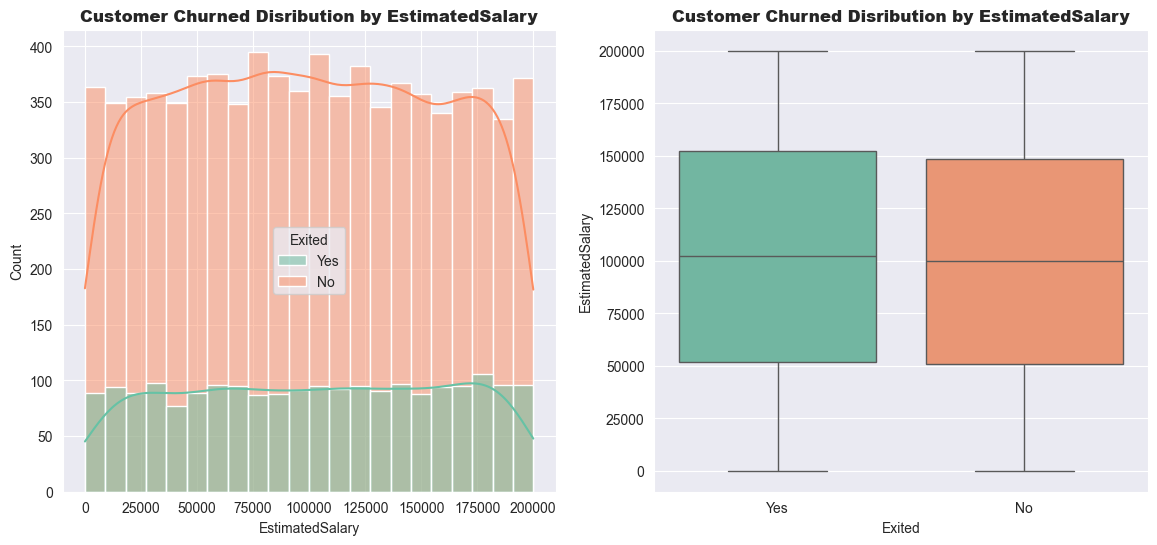

In [77]:
continous_plot('EstimatedSalary')

# Feature Engineering

In [78]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values = ["One product","Two Products","More Than 2 Products"]

In [79]:
df["Total_Products"] = np.select(conditions,values)
df.drop(columns="NumOfProducts", inplace=True)

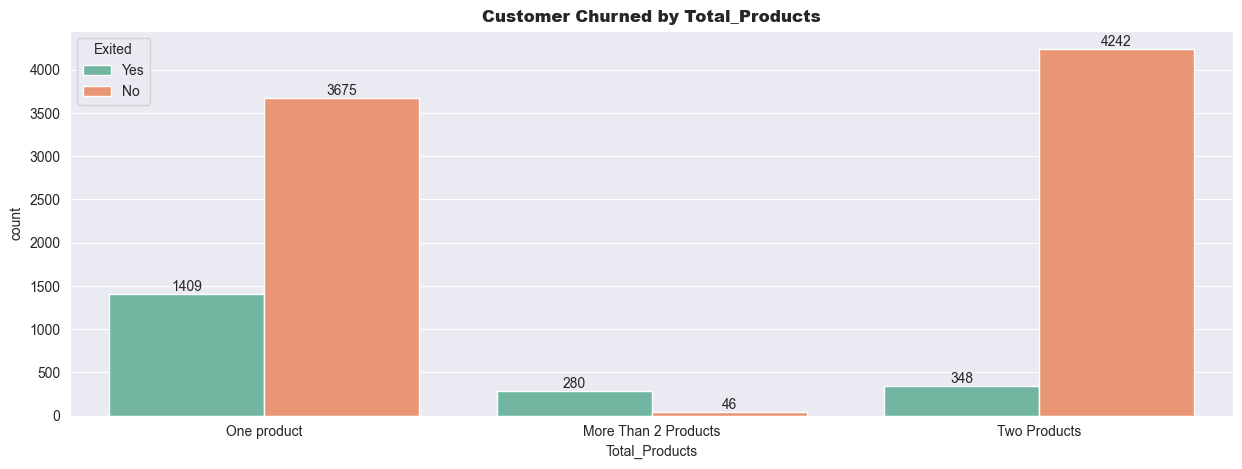

In [80]:
countplot("Total_Products")

In [81]:
df["Account_Balance"] = df["Balance"].apply(lambda x: "Zero Balance" if x==0 else "More Than zero Balance")

In [82]:
df.drop(columns = "Balance", inplace=True)

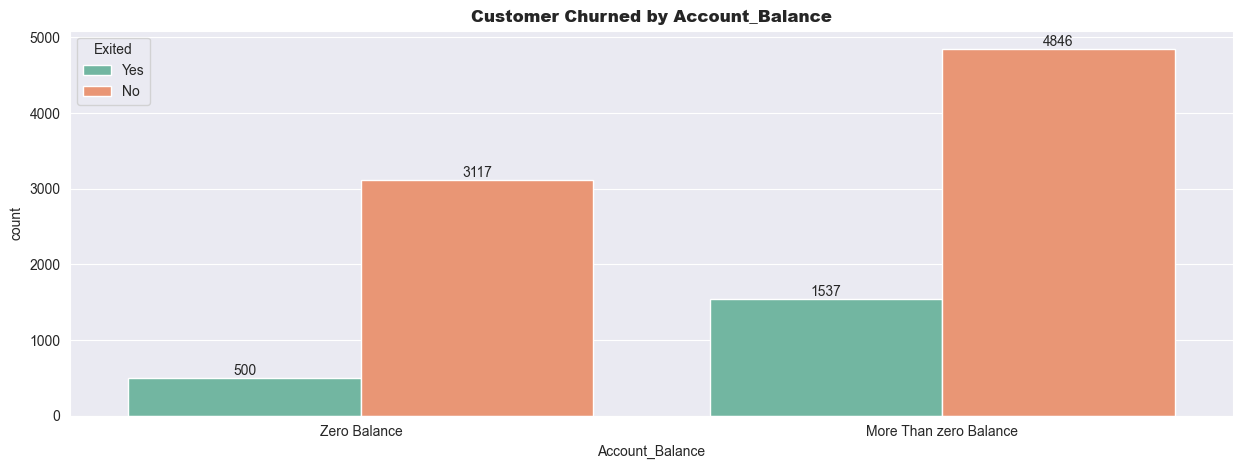

In [83]:
countplot("Account_Balance")

In [84]:
df = df.drop(['Surname', 'RowNumber', 'CustomerId'], axis = 1)

In [85]:
df

,CreditScore,Geography,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Total_Products,Account_Balance
0,619,France,Female,42,2,1,1,101348.88,Yes,One product,Zero Balance
1,608,Spain,Female,41,1,0,1,112542.58,No,One product,More Than zero Balance
2,502,France,Female,42,8,1,0,113931.57,Yes,More Than 2 Products,More Than zero Balance
3,699,France,Female,39,1,0,0,93826.63,No,Two Products,Zero Balance
4,850,Spain,Female,43,2,1,1,79084.10,No,One product,More Than zero Balance
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,1,0,96270.64,No,Two Products,Zero Balance
9996,516,France,Male,35,10,1,1,101699.77,No,One product,More Than zero Balance
9997,709,France,Female,36,7,0,1,42085.58,Yes,One product,Zero Balance
9998,772,Germany,Male,42,3,1,0,92888.52,Yes,Two Products,More Than zero Balance


In [86]:
col = ['Geography', 'Gender', 'Total_Products',	'Account_Balance']

for column in col:
    print(df[column].unique())
    print('\n')

['France' 'Spain' 'Germany']


['Female' 'Male']


['One product' 'More Than 2 Products' 'Two Products']


['Zero Balance' 'More Than zero Balance']




In [87]:
df = pd.get_dummies(df, columns=col)

In [88]:
df["Exited"].replace({"Yes": 0, "No": 1}, inplace=True)

In [89]:
cols = ["CreditScore","Age","EstimatedSalary"]
df[cols].skew()

CreditScore       -0.071607
Age                1.011320
EstimatedSalary    0.002085
dtype: float64

## Age Feature is highly right-skewed. Skewness can negatively impact the performance of certain machine learning algorithms. To overcome the right-skewed distribution we can use log normal transformation to achieve a normal distribution.

In [90]:
old_age = df['Age']
df['Age'] = np.log(df["Age"])

Text(0.5, 1.0, 'Age Distribution After Transformation ')

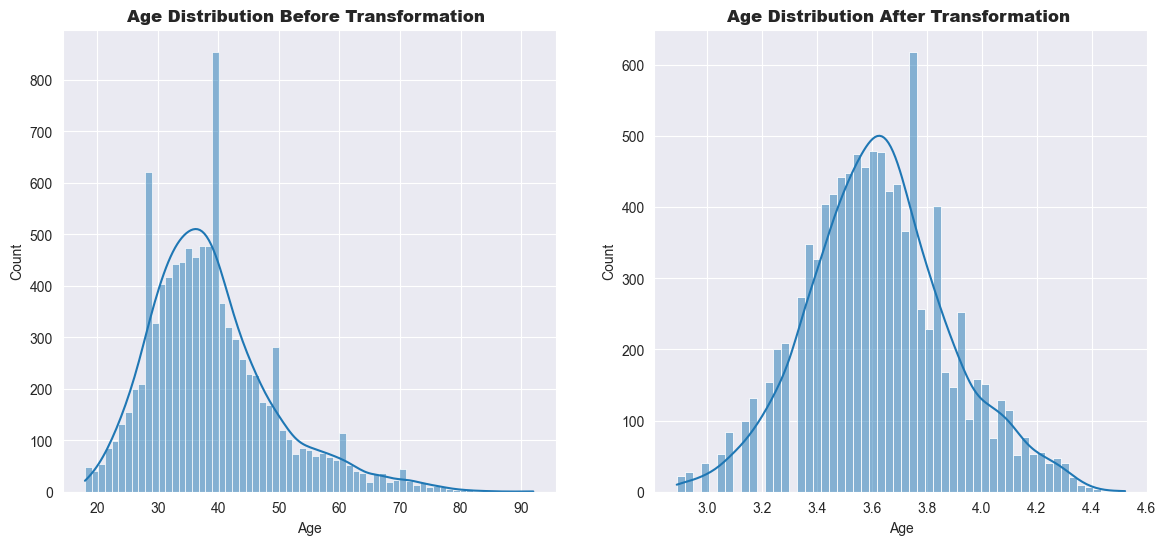

In [91]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(x=old_age, data=df, kde = True, palette="Set2")
plt.title(f"Age Distribution Before Transformation ",fontweight="black")

plt.subplot(1,2,2)
sns.histplot(x=df['Age'], data=df, kde = True, palette="Set2")
plt.title(f"Age Distribution After Transformation ",fontweight="black")

In [92]:
df

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,3.737670,2,1,1,101348.88,0,True,False,False,True,False,False,True,False,False,True
1,608,3.713572,1,0,1,112542.58,1,False,False,True,True,False,False,True,False,True,False
2,502,3.737670,8,1,0,113931.57,0,True,False,False,True,False,True,False,False,True,False
3,699,3.663562,1,0,0,93826.63,1,True,False,False,True,False,False,False,True,False,True
4,850,3.761200,2,1,1,79084.10,1,False,False,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,3.663562,5,1,0,96270.64,1,True,False,False,False,True,False,False,True,False,True
9996,516,3.555348,10,1,1,101699.77,1,True,False,False,False,True,False,True,False,True,False
9997,709,3.583519,7,0,1,42085.58,0,True,False,False,True,False,False,True,False,False,True
9998,772,3.737670,3,1,0,92888.52,0,False,True,False,False,True,False,False,True,True,False


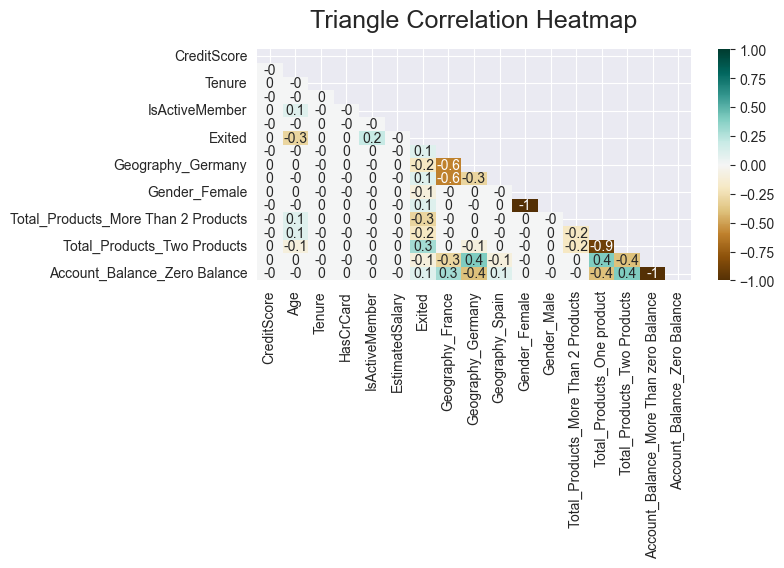

In [93]:
plt.figure(figsize=(7, 3))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(round(df.corr(),1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [94]:
df.nunique()

CreditScore                                460
Age                                         70
Tenure                                      11
HasCrCard                                    2
IsActiveMember                               2
EstimatedSalary                           9999
Exited                                       2
Geography_France                             2
Geography_Germany                            2
Geography_Spain                              2
Gender_Female                                2
Gender_Male                                  2
Total_Products_More Than 2 Products          2
Total_Products_One product                   2
Total_Products_Two Products                  2
Account_Balance_More Than zero Balance       2
Account_Balance_Zero Balance                 2
dtype: int64

## Data Categorization by using Quantile-based discretization function

In [95]:
series = ['EstimatedSalary', 'CreditScore']
for i in series:
    cats, bins = pd.qcut(df[i], q=3, labels = ['low', 'medium', 'high'], retbins=True, duplicates='drop')
    print("EstimatedSalary bins:", bins)
    df[i] = cats

EstimatedSalary bins: [1.1580000e+01 6.7057270e+04 1.3280157e+05 1.9999248e+05]
EstimatedSalary bins: [350. 608. 695. 850.]


## Label Encoding

In [96]:
label_encoder = LabelEncoder() 

columns = ['EstimatedSalary', 'CreditScore']
for i in columns:
    df[i]= label_encoder.fit_transform(df[i])

In [97]:
df

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,2,3.737670,2,1,1,2,0,True,False,False,True,False,False,True,False,False,True
1,1,3.713572,1,0,1,2,1,False,False,True,True,False,False,True,False,True,False
2,1,3.737670,8,1,0,2,0,True,False,False,True,False,True,False,False,True,False
3,0,3.663562,1,0,0,2,1,True,False,False,True,False,False,False,True,False,True
4,0,3.761200,2,1,1,2,1,False,False,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,3.663562,5,1,0,2,1,True,False,False,False,True,False,False,True,False,True
9996,1,3.555348,10,1,1,2,1,True,False,False,False,True,False,True,False,True,False
9997,0,3.583519,7,0,1,1,0,True,False,False,True,False,False,True,False,False,True
9998,0,3.737670,3,1,0,2,0,False,True,False,False,True,False,False,True,True,False


In [98]:
df.nunique()

CreditScore                                3
Age                                       70
Tenure                                    11
HasCrCard                                  2
IsActiveMember                             2
EstimatedSalary                            3
Exited                                     2
Geography_France                           2
Geography_Germany                          2
Geography_Spain                            2
Gender_Female                              2
Gender_Male                                2
Total_Products_More Than 2 Products        2
Total_Products_One product                 2
Total_Products_Two Products                2
Account_Balance_More Than zero Balance     2
Account_Balance_Zero Balance               2
dtype: int64

In [99]:
print("Classes:", label_encoder.classes_)

Classes: ['high' 'low' 'medium']


medium - 2
low - 1
high - 0

In [100]:
Counter(df['Exited'])

Counter({1: 7963, 0: 2037})

In [101]:
M = df.drop(['Exited'], axis = 1)
N = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(M, N, test_size = 0.2, shuffle = True, random_state = 42)

In [102]:
smt = SMOTE(random_state=42)
X_train_res,y_train_res = smt.fit_resample(X_train,y_train)
print(X_train_res.shape ,y_train_res.shape)

(12712, 16) (12712,)


In [103]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train_res)
X_test_scaled = sc.transform(X_test)

## XGBoost

In [104]:
xg_params_rand = {
    "booster": ["gbtree"],
    "max_depth": [3, 4, 5, 6, 7, 8, 9],
    "min_child_weight": [1, 3, 5, 7, 10, 20],
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    "n_estimators": [100, 200, 300, 500],
    "gamma": [0, 0.1, 0.2, 0.3, 0.5],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "reg_alpha": [0, 0.01, 0.1, 1, 5, 10],
    "reg_lambda": [0.5, 1, 1.5, 2, 5, 10],
    "scale_pos_weight": [1, 2, 3, 5, 10],
    "tree_method": ["hist", "approx"]
}

In [105]:
rand_search = RandomizedSearchCV(estimator= xg.XGBClassifier(),
                       param_distributions=xg_params_rand,
                       cv=10,
                       n_jobs=-1,
                       return_train_score=True)

In [106]:
import time
start_time = time.time()
rand_search.fit(X_train_scaled,y_train_res)
y_pred = rand_search.predict(X_test_scaled)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 12.014432430267334 seconds


In [107]:
best_parameters = rand_search.best_params_

print("Best Parameters for xgboost model is:\n\n")
best_parameters

Best Parameters for xgboost model is:




{'tree_method': 'approx',
 'subsample': 0.6,
 'scale_pos_weight': 2,
 'reg_lambda': 1.5,
 'reg_alpha': 1,
 'n_estimators': 500,
 'min_child_weight': 10,
 'max_depth': 9,
 'learning_rate': 0.15,
 'gamma': 0,
 'colsample_bytree': 1.0,
 'booster': 'gbtree'}

In [108]:
xgb_clf = xg.XGBClassifier(**best_parameters)
xgb_clf.fit(X_train_scaled,y_train_res)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [109]:
def report(classifier):
    y_pred = classifier.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    conf_m = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")

    print(f"Classification Report:")
    print(report)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=classifier.classes_)
    disp.plot()
    plt.show()

In [110]:
y_train_pred = xgb_clf.predict(X_train_scaled)
y_test_pred = xgb_clf.predict(X_test_scaled)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_res,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 95.12 %
Accuracy Score of Model on Testing Data  is => 85.35 %


In [111]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8535
Recall Score of the Model is => 0.8535
Precision Score of the Model is => 0.8535


Accuracy: 0.8535
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.45      0.55       393
           1       0.88      0.95      0.91      1607

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



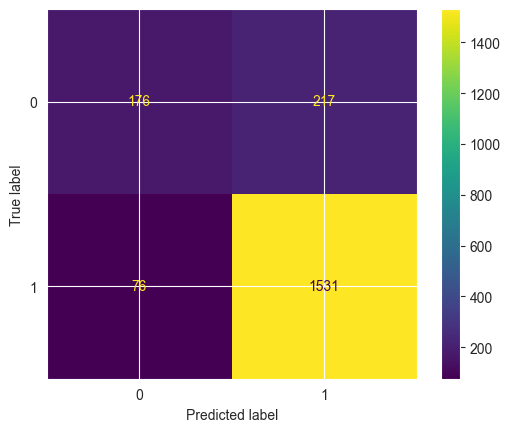

In [112]:
report(xgb_clf)

In [113]:
k_folds = StratifiedKFold(n_splits = 10)

scores_xgb = cross_val_score(xgb_clf, X_train_scaled, y_train_res, cv=k_folds, scoring='f1')

In [114]:
print("Cross Validation Scores: ", scores_xgb)
print("Average CV Score: ", scores_xgb.mean())
print("Number of CV Scores used in Average: ", len(scores_xgb))

Cross Validation Scores:  [0.77142857 0.77890724 0.83862069 0.96546185 0.95546559 0.96507937
 0.95443645 0.95715441 0.95961228 0.9628433 ]
Average CV Score:  0.9109009733456492
Number of CV Scores used in Average:  10


# Feature importance

CreditScore, Score: 0.01785
Age, Score: 0.04516
Tenure, Score: 0.01780
HasCrCard, Score: 0.01930
IsActiveMember, Score: 0.05589
EstimatedSalary, Score: 0.01933
Geography_France, Score: 0.01645
Geography_Germany, Score: 0.03640
Geography_Spain, Score: 0.02528
Gender_Female, Score: 0.02186
Gender_Male, Score: 0.01499
Total_Products_More Than 2 Products, Score: 0.41747
Total_Products_One product, Score: 0.09391
Total_Products_Two Products, Score: 0.09692
Account_Balance_More Than zero Balance, Score: 0.05821
Account_Balance_Zero Balance, Score: 0.04318


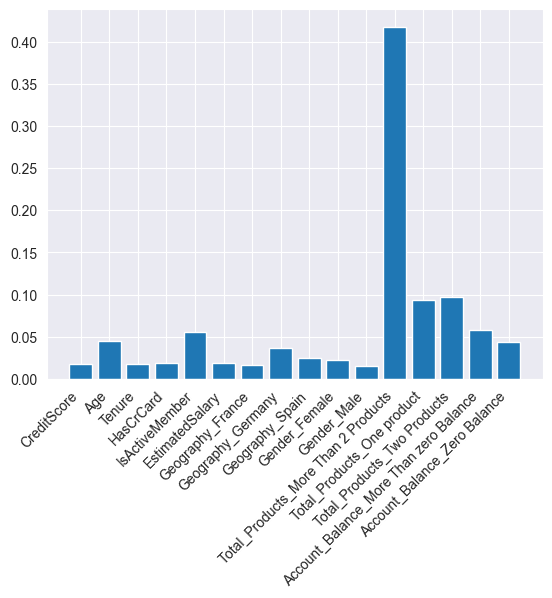

In [116]:
# Get importance
importance = xgb_clf.feature_importances_

for feature_name, score in zip(X_train.columns, importance):
    print(f'{feature_name}, Score: {score:.5f}')
plt.bar([x for x in X_train.columns], importance)
plt.xticks(rotation=45, ha="right")
plt.show()

# Visualization of Classification

In [1476]:
def TSNE_plot(model_clf, data, labels, title):
    model_clf.fit(data, labels)
    transformed_data = model_clf.predict_proba(data)

    tsne_model = TSNE(n_components=2, random_state=0, init='random')
    tsne_data = tsne_model.fit_transform(transformed_data)

    tsne_data = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

    sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

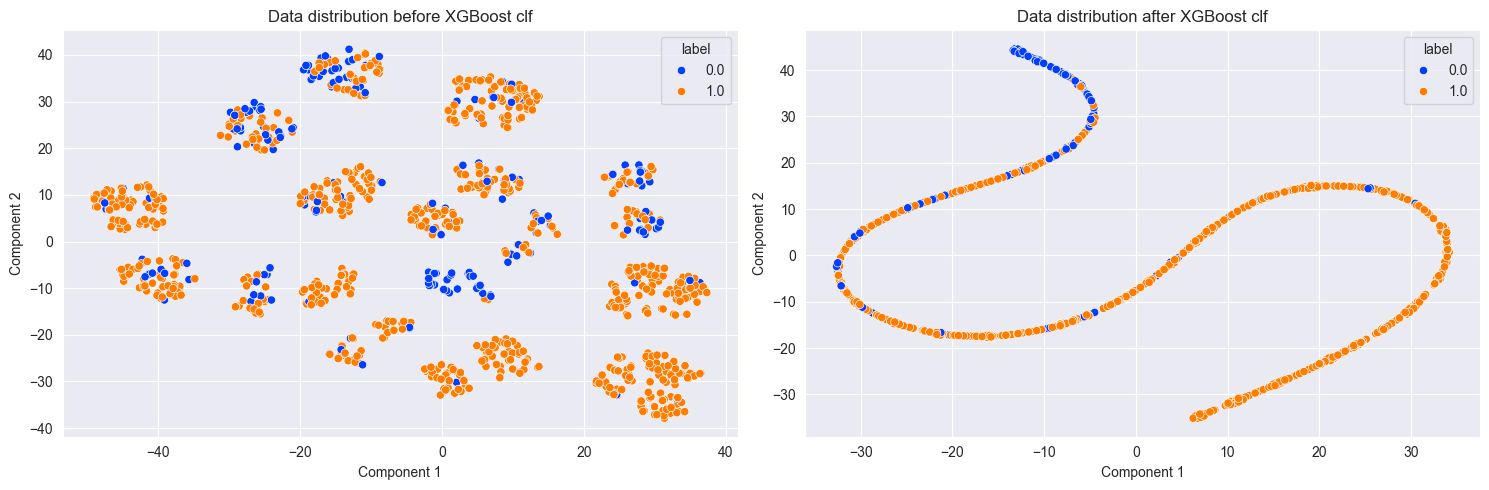

In [1477]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
data_1000 = X_train_scaled[0:1000, :]
labels_1000 = y_train.iloc[0:1000]

tsne_model = TSNE(n_components=2, random_state=0, init='random')
tsne_data = tsne_model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.title("Data distribution before XGBoost clf")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.subplot(1, 2, 2)
TSNE_plot(xgb_clf, data_1000, labels_1000, "Data distribution after XGBoost clf")

plt.tight_layout()
plt.show()


# Problem solving via Pipeline


===== Testing SMOTE =====
Accuracy: 0.862
              precision    recall  f1-score   support

           0       0.81      0.39      0.52       393
           1       0.87      0.98      0.92      1607

    accuracy                           0.86      2000
   macro avg       0.84      0.68      0.72      2000
weighted avg       0.86      0.86      0.84      2000


===== Testing ADASYN =====
Accuracy: 0.859
              precision    recall  f1-score   support

           0       0.81      0.37      0.51       393
           1       0.86      0.98      0.92      1607

    accuracy                           0.86      2000
   macro avg       0.84      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000


===== Testing SMOTETomek =====
Accuracy: 0.862
              precision    recall  f1-score   support

           0       0.79      0.40      0.53       393
           1       0.87      0.97      0.92      1607

    accuracy                           0.86    

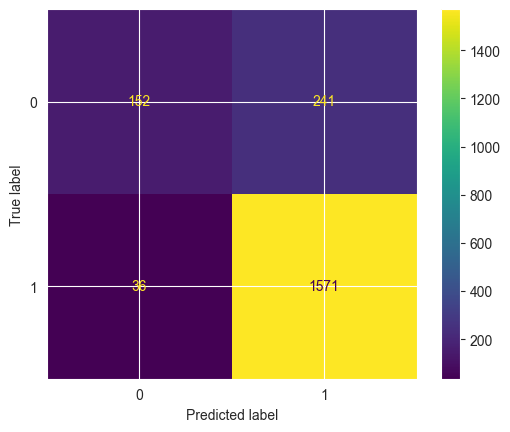

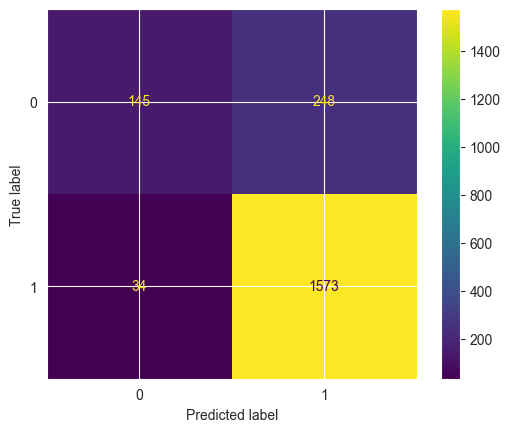

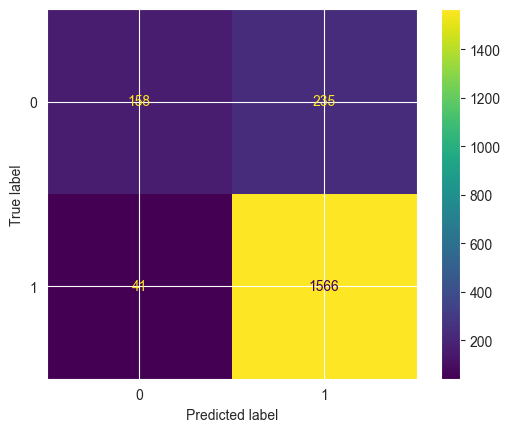

In [1478]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

oversamplers = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

for name, sampler in oversamplers.items():
    print(f"\n===== Testing {name} =====")

    pipe = Pipeline([
        ('sampler', sampler),
        ('scaler', StandardScaler()),
        ('classifier', xgb.XGBClassifier(**best_parameters))
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.3f}")

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot()

    print(classification_report(y_test, y_pred))